<a href="https://colab.research.google.com/github/bogdanbabych/experiments_NLTK/blob/main/Basic_Level_DataLitMT_Data_Evaluation_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

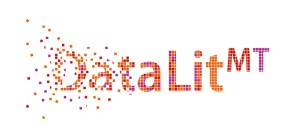

# Data Evaluation – Basic Level
**MT Quality Score Calculator for Metrics Based on String Matching and for Embedding-based Metrics**

# Introduction

This is a Colab notebook for calculating automatic metrics for machine translation (MT) quality evaluation, which covers the *Data Evaluation* dimension of the [DataLit<sup>MT</sup> Competence Matrix](https://itmk.github.io/The-DataLitMT-Project/matrix/) and here particularly the subdimensions of *Data Analysis*, *Data Verbalisation* (to some extent) and *Data Interpretation*. Given that MT systems are increasingly used as productivity-enhancing tools in the professional translation process, both manual and automatic evaluation of MT output become more and more important. Automatic MT quality evaluation is part of *Technical MT Literacy*, as illustrated in the [Professional Machine Translation Literacy Framework](https://itmk.github.io/The-DataLitMT-Project/framework/#professional-mt-literacy). In this notebook, we will introduce two traditional MT quality metrics based on string matching and two modern embedding-based metrics, and we will illustrate the differences between these metrics. After working through this notebook, you should have a basic understanding of how automatic MT quality evaluation works and how the various scores differ from each other.

The code used for the score calculations in this notebook is adopted from the Natural Language Toolkit ([NLTK](https://www.nltk.org/)) and the respective GitHub repositories of each metric (references will be given throughout the notebook).

All metrics presented in this notebook are based on a comparison between a machine-translated sentence (which is often called *hypothesis* in MT research) and a corresponding human reference translation (*reference*), which is the 'gold standard' that any MT hypothesis should strive to achieve. The fundamental distinction we make in this notebook is between traditional MT quality scores which rely on exact string matching between string A (MT output/hypothesis) and string B (reference translation/gold standard) to calculate the similarity or dissimilarity between the two strings, and embedding-based metrics, which use the concept of *word embeddings* to calculate the (dis)similarity between hypothesis and reference based on the relative proximity of their word embeddings in high-dimensional vector space. If you’re confused right now, don’t worry, we will explain all of this in more detail in the course of this notebook.

A walk-through of this notebook is shown in the [accompanying tutorial video](https://www.youtube.com/watch?v=Zgc11Mp0Rww&t=9s).

## 0 Housekeeping

You can run all cells in this notebook without having to change any of the code. However, in the examples discussed below, feel free to enter your own MT and reference sentences, if you'd like to calculate individual scores.

First, we need to ensure that we installed/upgraded the Python installer *pip*, which we will use to install external libraries in our notebook. To do so, run the cell below.

In [1]:
# Upgrade to the current version of pip
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


That’s it, you’re ready to go!

# String-based Metrics

In this section, we cover traditional MT quality evaluation metrics which are based on the comparison of two strings, i.e., the MT output/hypothesis and the human reference translation. A full understanding of these string matching-based metrics relies on understanding the three basic concepts of *precision*, *recall* and *n-gram*. In order to avoid overcrowding the current notebook, we created [a companion notebook for automatic MT quality evaluation metrics based on string matching](https://colab.research.google.com/drive/1G0uwf5kPG5d5kmd-LbvkkssKoza9N622?usp=sharing), which covers these three concepts in detail. You should get a basic understanding of traditional MT quality metrics without working through this companion notebook. However, if you want to get down to the nuts and bolts of these metrics, the companion notebook is the place to start.

## 1 BLEU (a similarity measure)

BLEU is an acronym for **B**i**L**ingual **E**valuation **U**nderstudy. It was originally proposed in [Papineni et al. (2002): BLEU: A Method for Automatic Evaluation of Machine Translation](https://www.aclweb.org/anthology/P02-1040.pdf). BLEU is still a commonly used automatic MT quality score because it is widely known in MT research and practice and it often achieves reasonably good correlations with human quality judgements. (A high correlation with human quality judgements is considered the ultimate ‘seal of approval’ for any automatic MT quality evaluation metric.)

BLEU is a similarity measure, which derives its name from the fact that it measures the degree of similarity between two strings (i.e., the degree of similarity between the machine-translated sentence and the human-translated reference sentence). The closer the machine translation is to the reference translation, the better is the quality of the MT output (remember that we consider the reference to be our gold standard). Therefore, the *higher* the BLEU score calculated for a given MT output/reference pair, the *higher* the quality of the MT output is assumed to be, and vice versa.

BLEU scores published in official machine translation competitions such as the [Conference on Machine Translation (WMT)](http://www.statmt.org/wmt20/) are calculated using the [SacreBLEU](https://github.com/mjpost/sacrebleu) package. SacreBLEU is a standardised method for BLEU score calculation allowing the comparison of BLEU scores provided by different MT developers for different MT systems. sacreBLEU was originally proposed in [Post (2018): A Call for Clarity in Reporting BLEU Scores](https://arxiv.org/abs/1804.08771). To follow good industry practice, we also use sacreBLEU in this notebook.

### 1.0 Installing sacreBLEU

Run the cell below to install sacreBLEU.

In [2]:
# Import sacreBLEU functions
!pip install sacrebleu
import sacrebleu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [sacrebleu]


###1.1 Short Example

In the example below, we define a human reference sentence and a machine-translated hypothesis. For these two sentences (which we’ll encounter at various points in this notebook), we can calculate a BLEU score. Run the following cell to do so.

In [3]:
# Define reference and hypothesis
hypothesis_sacreBLEU = ['I drove the automobile to the gasoline station']
reference_sacreBLEU = ['I drove the car to the gas station']

# Calculate and print sacreBLEU score
sacrebleu.corpus_bleu(hypothesis_sacreBLEU, [reference_sacreBLEU])

BLEU = 27.05 75.0/42.9/16.7/10.0 (BP = 1.000 ratio = 1.000 hyp_len = 8 ref_len = 8)

As you can see, we get a BLEU score of 27.05 (indicated by *BLEU = 27.05*). The scale here ranges from 0 to 100, so 27.05 is a below-average value (note that the two sentences express basically the same meaning, albeit using slightly different words). In real-life MT quality evaluation scenarios, BLEU scores are rarely as high as 100 (which would mean that the MT output is identical to the reference translation) and usually start being competitive from 20 upward. We will ignore the additional values on the left side of the BLEU score. These will be covered in our [Advanced MT Quality Evaluation notebook](https://colab.research.google.com/drive/1UgsqgN-6yfDESU7Geei4RXzJShEQNViZ?usp=sharing), which discusses the various MT quality metrics illustrated here in much more detail.

###1.2 Your Own Example

If you would like to test BLEU score calculation with an example of your own, run the first code cell below and then type in your own example sentences in the field below the cell (both times, confirm with Enter). Then, run the second cell below in order to calculate the BLEU score for your sentences.

In [4]:
# Enter machine-translated sentence (hypothesis) and the human reference translation (reference)
own_hypothesis = input("\nEnter the machine-translated sentence here: ")
own_reference = input("\nEnter the human-translated sentence here: ")


Enter the machine-translated sentence here: the cat sat on a rug

Enter the human-translated sentence here: the cat sat on a mat


In [5]:
# Calculate and print your own sacreBLEU score
sacrebleu.corpus_bleu([own_hypothesis], [[own_reference]])

BLEU = 75.98 83.3/80.0/75.0/66.7 (BP = 1.000 ratio = 1.000 hyp_len = 6 ref_len = 6)

You can always come back here to calculate further BLEU scores.

## 2 TER

In addition to string-based *similarity* measures, there are also string-based *distance* measures. These derive their name from the fact that they measure the degree of *dissimilarity* or distance between two strings. Accordingly, the *higher* the score calculated by these metrics, the *lower* the quality of the MT output is assumed to be, and vice versa (opposite to the scores of similarity measures such as BLEU).

**TER** is an acronym for **T**ranslation **E**dit **R**ate, originally proposed in [Snover et al. (2006): A Study of Translation Edit Rate with Targeted Human Annotation](http://www.cs.umd.edu/~snover/pub/amta06/ter_amta.pdf).

### 2.0 Installing TER

For calculating TER, we need to install the [pyter](https://pypi.org/project/pyter3/) and import some NLTK functions. This is done by running the code below.

In [6]:
# Install the current version of the pyter package
!pip install --upgrade pyter3

# Import ter() and word_tokenize() functions
from pyter import ter
from nltk import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2.1 Short Example

In the example below, we define the same reference and hypothesis sentences we used for our BLEU score calculation. For these two sentences, we can then calculate a TER score. Run the following cell to calculate the score.

In [7]:
!pip install --upgrade pyter3

In [8]:
# Import ter() and word_tokenize() functions
from pyter import ter
from nltk import word_tokenize

import nltk
# Download the specific 'punkt_tab' resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
# Define reference and hypothesis
hypothesis_ter = 'I drove the automobile to the gasoline station'
reference_ter = 'I drove the car to the gas station'

# Calculate and print Translation Edit Rate
TER = ter(word_tokenize(hypothesis_ter), word_tokenize(reference_ter))
print(f"TER: {TER}")

TER: 0.25


As you can see, we obtain a TER score of 0.25 (with the scale of possible scores ranging from 0 to 1). In other words, our editing effort amounted to 25 %, which is rather low, indicating a good quality of the MT output (remember, the lower the TER score, the higher the MT quality and vice versa). Note that our BLEU score for our hypothesis/reference pair indicated a rather poor MT quality (27.05 of 100, with BLEU being a similarity measure -> the higher the score the better the MT quality and vice versa), while our TER score indicates a good MT quality. This is a good lesson to learn: Automatic MT quality scores should never be taken at face value. Always ask yourself how the metric for which the score was calculated actually works and *what the score means in relation to the operating principle of this metric!*

TER or similar distance measures are often used in the translation industry for calculating the post-editing effort involved in MT-assisted translation projects (which can then be used for price calculation). For more information on this topic, see, e.g. the article by [Kirchner (2020)](https://aclanthology.org/2020.eamt-1.38/).

### 2.2 Your Own Example

If you would like to test TER score calculation with an example of your own, run the first code cell below and then type in your own example sentences in the field below the cell (both times, confirm with Enter). Then, run the second cell below in order to calculate the TER score for your sentences (the same as under 1.2).

In [10]:
# Enter machine-translated sentence (hypothesis) and the human reference translation (reference)
own_ter_hypothesis = input("\nEnter the machine-translated sentence here: ")
own_ter_reference = input("\nEnter the human-translated sentence here: ")


Enter the machine-translated sentence here: the cat sat on a rug

Enter the human-translated sentence here: the cat sat on a mat


In [11]:
# Calculate and print your own Translation Edit Rate
TER = ter(word_tokenize(own_ter_hypothesis), word_tokenize(own_ter_reference))
print(f"TER: {TER}")

TER: 0.16666666666666666


Again, feel free to come back here any time to calculate further TER scores.

# Embedding-based Metrics BERTScore and COMET

Now that we are familiar with traditional MT quality metrics based on string matching, we can move on to modern quality metrics which are based on embeddings. These embedding-based metrics are a bit more complex than the traditional string matching-based metrics, because they rely on the concept of *word embeddings*. If you want to know more about this concept, have a look at our [companion notebook for embedding-based MT quality metrics](https://colab.research.google.com/drive/1qM9srwtTfaapTnKcQGMYct1iFGyL1XjB?usp=sharing). If you want to skip this notebook, just bear in mind that word embeddings offer a way to compare the *semantic* similarity between two words, instead of just their *formal* similarity (as string-based metrics such as BLEU and TER do). For example, string-based metrics would consider the two words *car* and *automobile* to be dissimilar because they differ in their surface forms. Embedding-based metrics, on the other hand, would consider the two words to be similar because they basically express the same meaning. This distinction should become clearer in the following sections.

## 3 BERTScore: semantic similarity

BERTScore is an embedding-based metric relying on semantic similarity. BERTScore was originally proposed in [Zhang et al. (2019): BERTScore: Evaluating Text Generation with BERT](https://arxiv.org/abs/1904.09675). It uses the pre-trained word embeddings from Google's neural language model BERT (see [Devlin et al. (2019): BERT: Pre-Training of Deep Bidirectional Transformers for Language Understanding](https://www.aclweb.org/anthology/N19-1423/)) in order to compare the similarity of words in hypothesis and reference sentences.
Let’s calculate our own BERTScores.

### 3.0 Installing BERTScore

First, we need to install the packages required to compute BERTScore. BERTScore is implemented as part of the bert-score package available in the [official BERTScore GitHub repository](https://github.com/Tiiiger/bert_score). Since embedding-based metrics rely on large embedding models, installing these metrics will usually take considerably longer than installing and importing traditional MT quality metrics.

In [12]:
# Install BERTScore
!pip install bert-score
from bert_score import score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 134.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 187.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-

### 3.1 Short Example
Run the following cells to calculate BERTScore for the same hypothesis-reference pair we used for our BLEU and TER examples.

In [14]:
# Define hypothesis and reference
hypothesis = ['I drove the automobile to the gasoline station']
reference = ['I drove the car to the gas station']

In [15]:
# Calculate BERTScore
P, R, F1 = score(hypothesis, reference, lang="en", rescale_with_baseline=True, verbose=True)
# Note here, the language we are working with is English (lang="en"). Change this to lang="de" when working with German sentences, for example.

# Print Rbert, Pbert and Fbert
print(f"\nBERTScore-Recall: {R}\n")
print(f"BERTScore-Precision: {P}\n")
print(f"BERTScore-F-Measure: {F1}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.51 seconds, 1.96 sentences/sec

BERTScore-Recall: tensor([0.8669])

BERTScore-Precision: tensor([0.8669])

BERTScore-F-Measure: tensor([0.8671])


The cell above produces several scores, but we can just focus on $F_{BERT}$, which is the final BERTScore for this hypothesis-reference pair. BERTScore rescales this output so that it lies in a range between 0 and 1, with 0 being a very poor and 1 being a very good score (all differences aside, BERTScore is basically a similarity measure, just like BLEU). As you can see, our hypothesis-reference pair is scored very highly (BERTScore-F-Measure = 0.8671) because the two sentences express almost the same meaning, although they differ in their respective surface forms. Remember that our string matching-based metric BLEU scored the same hypothesis-reference pair rather poorly. This illustrates again the fundamental difference between traditional metrics based on string matching and modern embedding-based metrics: String-based metrics can only capture formal similarities between two strings whereas embedding-based metrics can capture semantic similarities between two strings, regardless of any formal differences between them. Keep this important difference in mind for future MT quality evaluation scenarios.

### 3.2 Your own Example.

You can type in your own English hypothesis and reference sentences to calculate a BERTScore (same as above).
BERTScore covers a large range of languages listed [here](https://github.com/google-research/bert/blob/master/multilingual.md#list-of-languages). Feel free to change hypothesis and reference according to your requirements. Note: For languages other than English, the command *lang="en"* has to be changed to the relevant input language.

In [16]:
# Enter machine-translated sentence (hypothesis) and the human reference translation (reference)
own_BERT_hypothesis = input("\nEnter the machine-translated sentence here: ")
own_BERT_reference = input("\nEnter the human-translated sentence here: ")


Enter the machine-translated sentence here: the cat sat on a rug

Enter the human-translated sentence here: the cat sat on a mat


In [17]:
# Calculate BERTScore
P, R, F1 = score([own_BERT_hypothesis], [own_BERT_reference], lang="en", rescale_with_baseline=True, verbose=True)
# Remember to change the language lang="en" if you input a non-english sentence (let's say for German: lang="de")

# Print Rbert, Pbert and Fbert
print(f"\nBERTScore-Recall: {R}\n")
print(f"BERTScore-Precision: {P}\n")
print(f"BERTScore-F-Measure: {F1}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.34 seconds, 2.90 sentences/sec

BERTScore-Recall: tensor([0.9177])

BERTScore-Precision: tensor([0.9176])

BERTScore-F-Measure: tensor([0.9178])


You may want to come up with more examples of hypothesis/reference pairs which differ in their form but express the same meaning or vice versa to see how these examples will be scored differently by string-based and embedding-based metrics respectively.

## 4 COMET: semantic similarity + human quality judgements

COMET is an embedding-based metric relying on semantic similarity and trained additionally on human quality judgements. **COMET** is an acronym for **C**rosslingual **O**ptimized **M**etric for **E**valuation of **T**ranslation. It was originally proposed  in [Rei et al. (2020): COMET: A Neural Framework for MT Evaluation](https://www.aclweb.org/anthology/2020.emnlp-main.213/). In contrast to traditional MT quality metrics based on string matching (such as BLEU or TER) and in contrast to the embedding-based metric BERTScore, COMET uses not only the machine-translated hypothesis and the human-translated reference but also the original source sentence. COMET is then able to measure the interlingual semantic similarity between these three sentences, i.e., COMET can establish both the semantic similarity between hypothesis and reference as well as the semantic similarity between source and hypothesis/reference. In addition, COMET takes into consideration prior human quality judgements taken, for example, from a human error annotation of machine-translated sentences or from a human ranking of such sentences on a 100-point-ranking scale. These human quality judgements allow COMET to measure nuanced aspects of machine-translated sentences beyond semantic similarity to their source/reference sentences.


### 4.0 Installing COMET
First, we need to install the packages required to compute COMET scores. The various COMET models are implemented as part of the unbabel-comet package available in the official [COMET GitHub repository](https://github.com/Unbabel/COMET). Since embedding-based metrics rely on large embedding models, installing COMET and loading the model will usually take some time (same as with BERTScore).

Note: Running this cell might result in the notebook requesting you to restart the runtime: "You must restart the runtime in order to use the newly installed version". You can restart the runtime in the menu under "runtime" --> "restart runtime". Then, you must run the cell in chapter 0 and the cell below again before moving on to section 4.1.


In [18]:
# Install the unbabel-comet package
!pip install unbabel-comet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 156.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 26.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [unbabel-comet]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-status 1.71.0

### 4.1 Loading the COMET model

The COMET default model is `Unbabel/wmt22-comet-da` ([Rei et al. (2022): COMET-22: Unbabel-IST 2022 Submission for the Metrics Shared Task](https://aclanthology.org/2022.wmt-1.52/)). There have been previous models, such as the lightweight model COMETinho, as listed on [COMET's models page](https://github.com/Unbabel/COMET/blob/master/MODELS.md). Run the cell below to load the default COMET model.

In [19]:
# Loading the COMET 'Unbabel/wmt22-comet-da' model
from comet import download_model, load_from_checkpoint
model_path = download_model("Unbabel/wmt22-comet-da")
model = load_from_checkpoint(model_path)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/567 [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.40k [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.1.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/2760a223ac957f30acfb18c8aa649b01cf1d75f2/checkpoints/model.ckpt`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


### 4.1.1 Short Example Using Single Sentences

The cell below calculates a COMET score for one hypothesis. Note that we do not only have to specify the human reference translation, but also the source sentence (we deviate here from our previous example sentences, as COMET differs from the other MT quality metrics we covered in this notebook).

In [20]:
# Defining source, hypothesis and reference sentences
data = [{ "src": "If you do not agree to these Conditions do not use this website.",
          "mt": "Wenn Sie mit diesen Bedingungen nicht einverstanden sind, benutzen Sie diese Website nicht.",
          "ref": "Wenn Sie mit diesen Bedingungen nicht einverstanden sind, sehen Sie von einer Nutzung dieser Website ab."      }]

# Calculate COMET scores
model_output = model.predict(data, batch_size=8, gpus=0) # This can be changed to 'gpus=1' if GPU is available
print("\nScore:", model_output)

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


Score: Prediction([('scores', [0.930147111415863]), ('system_score', 0.930147111415863)])


As you can see, we obtain a COMET score of around 0.93 for our hypothesis/reference/source combination. You can see a segment score, which indicates the COMET score per sentence ('scores'). Since we only compute a score for one hypothesis in this example, the sentence score is identical to the overall COMET score ('system_score'). If you calculate a score for multiple sentences (as we do below), you would have multiple segment scores, and one overall COMET score. COMET scores can be interpreted relative to a COMET model’s score range. More information on this can be found in the [official COMET Documentation](https://unbabel.github.io/COMET/html/faqs.html#is-there-a-theoretical-range-of-values-for-the-comet-regressor). Scores calculated by the default COMET model (such as exemplified here) range from 0 to 1, with 1 representing a perfect translation. Thus, the COMET score of 0.93 is a very high quality score.

### 4.1.2 Another Example Using Multiple Sentences
As mentioned above, you could also calculate an average COMET score for multiple sentences, with a different value for each segment (sentence). This is illustrated below.

In [21]:
# Defining source, hypothesis and reference sentences
data = [{ "src": "If you do not agree to these Conditions do not use this website.",
          "mt": "Wenn Sie mit diesen Bedingungen nicht einverstanden sind, benutzen Sie diese Website nicht.",
          "ref": "Wenn Sie mit diesen Bedingungen nicht einverstanden sind, sehen Sie von einer Nutzung dieser Website ab."      },
        {"src": "Please read these Conditions; they are important.",
         "mt": "Bitte lesen Sie diese Bedingungen; sie sind wichtig.",
         "ref": "Bitte lesen Sie diese Bedingungen durch; sie sind wichtig."        } ]

# Calculate COMET scores
model_output = model.predict(data, batch_size=8, gpus=0) # This can be changed to 'gpus=1' if GPU is available
print("\nScore:", model_output)

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


Score: Prediction([('scores', [0.9301472902297974, 0.9635558724403381]), ('system_score', 0.9468515813350677)])


Here, we score two MT hypotheses and obtain two segment/sentence scores of 0.93 (for the first segment/sentence, as in the example above) and of 0.96 (for the second segment/sentence). The final COMET score of 0.947 is simply the average of the two segment/sentence scores. We can see that COMET scores the second segment (where MT hypothesis and reference are identical) much higher than the first segment.

Congratulations! You have now successfully calculated various automatic MT quality evaluation metrics and should now have a basic understanding of how the individual scores work, how they are interpreted and what their individual advantages and shortcomings are. If you want to delve deeper into the topic of automatic MT quality evaluation, have a look at our [Advanced MT Quality Evaluation notebook](https://colab.research.google.com/drive/1UgsqgN-6yfDESU7Geei4RXzJShEQNViZ?usp=sharing). If you would like to evaluate the quality of an entire document, you can use our [companion notebook
on quality evaluation at document level](https://colab.research.google.com/drive/19a896dbRBVtJmqA6JIFBU7bUiASfAo6V?usp=sharing) to calculate an average metric for an entire document. You could also use your knowledge to perform an automatic quality evaluation of your own NMT model, which you can train in our [NMT Training notebook](https://colab.research.google.com/drive/1f3V7CshfVvrA5S6XtLAvl-beqBPN3qar?usp=sharing).